#  **Reading Data**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("WSNBFSFdataset V2.csv")
df

,Event,Time,S_Node,Node_id,Rest_Energy,Trace_Level,Mac_Type_Pckt,Source_IP_Port,Des_IP_Port,Packet_Size,...,Broadcast_ID,Dest_Node_Num,Dest_Seq_Num,Src_Node_ID,Src_Seq_Num,behaviour,Type,rate_of_energy_consumption,cumulative_energy_consumption,energy_consumption
0,1,0.100000,79,79,600.000000,5,0,79.255,1.255,48,...,1,100,0,79,4,No attack,normal,0.000000,0.000000,0.000000
1,2,0.100963,78,78,599.979723,5,800,79.255,1.255,48,...,1,100,0,79,4,No attack,normal,0.000000,0.000000,0.000000
2,2,0.100963,76,76,599.979722,5,800,79.255,1.255,48,...,1,100,0,79,4,No attack,normal,0.000000,0.000000,0.000000
3,2,0.100964,75,75,599.979722,5,800,79.255,1.255,48,...,1,100,0,79,4,No attack,normal,0.000000,0.000000,0.000000
4,2,0.100964,118,118,599.979722,5,800,79.255,1.255,48,...,1,100,0,79,4,No attack,normal,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312101,4,656.526536,140,140,465.332078,5,800,140.255,1.255,48,...,31,100,16,140,68,Under attack,Blackhole,0.205346,134.644127,0.140273
312102,4,657.209643,140,140,465.191806,5,800,140.255,1.255,48,...,33,100,16,140,72,Under attack,Blackhole,0.205344,134.784399,0.140272
312103,4,657.891729,140,140,465.051737,5,800,140.255,1.255,48,...,35,100,16,140,76,Under attack,Blackhole,0.205354,134.924468,0.140069
312104,4,658.574656,140,140,464.911501,5,800,140.255,1.255,48,...,37,100,16,140,80,Under attack,Blackhole,0.205346,135.064704,0.140236


In [ ]:
df.drop(labels = ['Trace_Level', 'Des_IP_Port', 'Node_id'], axis = 1, inplace = True)

# **TTL**

In [ ]:
c = df.select_dtypes(['object']).columns
c

Index(['behaviour', 'Type'], dtype='object')

In [ ]:
le = LabelEncoder()
df[c] = df[c].apply(LabelEncoder().fit_transform)
df

,Event,Time,S_Node,Rest_Energy,Mac_Type_Pckt,Source_IP_Port,Packet_Size,TTL,Hop_Count,Broadcast_ID,Dest_Node_Num,Dest_Seq_Num,Src_Node_ID,Src_Seq_Num,behaviour,Type,rate_of_energy_consumption,cumulative_energy_consumption,energy_consumption
0,1,0.100000,79,600.000000,0,79.255,48,30,1,1,100,0,79,4,0,3,0.000000,0.000000,0.000000
1,2,0.100963,78,599.979723,800,79.255,48,30,1,1,100,0,79,4,0,3,0.000000,0.000000,0.000000
2,2,0.100963,76,599.979722,800,79.255,48,30,1,1,100,0,79,4,0,3,0.000000,0.000000,0.000000
3,2,0.100964,75,599.979722,800,79.255,48,30,1,1,100,0,79,4,0,3,0.000000,0.000000,0.000000
4,2,0.100964,118,599.979722,800,79.255,48,30,1,1,100,0,79,4,0,3,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312101,4,656.526536,140,465.332078,800,140.255,48,30,1,31,100,16,140,68,1,0,0.205346,134.644127,0.140273
312102,4,657.209643,140,465.191806,800,140.255,48,30,1,33,100,16,140,72,1,0,0.205344,134.784399,0.140272
312103,4,657.891729,140,465.051737,800,140.255,48,30,1,35,100,16,140,76,1,0,0.205354,134.924468,0.140069
312104,4,658.574656,140,464.911501,800,140.255,48,30,1,37,100,16,140,80,1,0,0.205346,135.064704,0.140236


In [ ]:
df = (df - df.min()) / (df.max() - df.min())
df

,Event,Time,S_Node,Rest_Energy,Mac_Type_Pckt,Source_IP_Port,Packet_Size,TTL,Hop_Count,Broadcast_ID,Dest_Node_Num,Dest_Seq_Num,Src_Node_ID,Src_Seq_Num,behaviour,Type,rate_of_energy_consumption,cumulative_energy_consumption,energy_consumption
0,0.000000,0.000000,0.396985,1.000000,0.0,0.396985,0.0,1.0,0.0,0.000000,0.392638,0.000000,0.420213,0.000000,0.0,1.0,0.00000,0.000000,0.000000
1,0.333333,0.000001,0.391960,0.999854,1.0,0.396985,0.0,1.0,0.0,0.000000,0.392638,0.000000,0.420213,0.000000,0.0,1.0,0.00000,0.000000,0.000000
2,0.333333,0.000001,0.381910,0.999854,1.0,0.396985,0.0,1.0,0.0,0.000000,0.392638,0.000000,0.420213,0.000000,0.0,1.0,0.00000,0.000000,0.000000
3,0.333333,0.000001,0.376884,0.999854,1.0,0.396985,0.0,1.0,0.0,0.000000,0.392638,0.000000,0.420213,0.000000,0.0,1.0,0.00000,0.000000,0.000000
4,0.333333,0.000001,0.592965,0.999854,1.0,0.396985,0.0,1.0,0.0,0.000000,0.392638,0.000000,0.420213,0.000000,0.0,1.0,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312101,1.000000,0.966819,0.703518,0.033212,1.0,0.703518,0.0,1.0,0.0,0.434783,0.392638,0.941176,0.744681,0.457143,1.0,0.0,0.00149,0.966783,0.018874
312102,1.000000,0.967825,0.703518,0.032205,1.0,0.703518,0.0,1.0,0.0,0.463768,0.392638,0.941176,0.744681,0.485714,1.0,0.0,0.00149,0.967790,0.018874
312103,1.000000,0.968830,0.703518,0.031199,1.0,0.703518,0.0,1.0,0.0,0.492754,0.392638,0.941176,0.744681,0.514286,1.0,0.0,0.00149,0.968796,0.018847
312104,1.000000,0.969836,0.703518,0.030192,1.0,0.703518,0.0,1.0,0.0,0.521739,0.392638,0.941176,0.744681,0.542857,1.0,0.0,0.00149,0.969803,0.018870


In [ ]:
y = df['TTL']
x = df.drop(['TTL'], axis = 1)

# **SelectKBest**

In [ ]:
selector = SelectKBest(f_regression, k=3)
selector.fit(x, y)
x_selected = selector.transform(x)

selector1 = SelectKBest(f_regression, k=5)
selector1.fit(x, y)
x_selected1 = selector1.transform(x)

selector2 = SelectKBest(f_regression, k=7)
selector2.fit(x, y)
x_selected2 = selector2.transform(x)


In [ ]:
x.columns[selector.get_support()]

Index(['Hop_Count', 'Dest_Seq_Num', 'Src_Node_ID'], dtype='object')

In [ ]:
x1 = pd.DataFrame(df[['Hop_Count', 'Dest_Seq_Num', 'Src_Node_ID']])

In [ ]:
x.columns[selector1.get_support()]

Index(['Hop_Count', 'Broadcast_ID', 'Dest_Seq_Num', 'Src_Node_ID',
       'Src_Seq_Num'],
      dtype='object')

In [ ]:
x2 = pd.DataFrame(df[['Hop_Count', 'Broadcast_ID', 'Dest_Seq_Num', 'Src_Node_ID','Src_Seq_Num']])

In [ ]:
x.columns[selector2.get_support()]

Index(['Hop_Count', 'Broadcast_ID', 'Dest_Seq_Num', 'Src_Node_ID',
       'Src_Seq_Num', 'behaviour', 'Type'],
      dtype='object')

In [ ]:
x3 = pd.DataFrame(df[['Hop_Count', 'Broadcast_ID', 'Dest_Seq_Num', 'Src_Node_ID','Src_Seq_Num', 'behaviour', 'Type']])

In [ ]:
# linear regression when the kbest selection feature equal 3
result = []

for i in range(30):
  x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size = 0.2, random_state = i)

  lr = LinearRegression()

  lr.fit(x_train, y_train)

  y_pred = lr.predict(x_test)

  metrics = {"MAE" : mean_absolute_error(y_test, y_pred), "MSE" : mean_squared_error(y_test, y_pred),
             "RMSE" : mean_squared_error(y_test, y_pred, squared=False), "R2" : r2_score(y_test, y_pred)}

  result.append(metrics)

  df1 = pd.DataFrame(result)

In [ ]:
df1['R2'].mean()

0.4900919450117526

In [ ]:
# linear regression when the kbest selection feature equal 5
result1 = []

for i in range(30):
  x_train1, x_test1, y_train1, y_test1 = train_test_split(x2, y, test_size = 0.2, random_state = i)

  lr1 = LinearRegression()

  lr1.fit(x_train1, y_train1)

  y_pred1 = lr1.predict(x_test1)

  metrics1 = {"MAE1" : mean_absolute_error(y_test1, y_pred1), "MSE1" : mean_squared_error(y_test1, y_pred1),
             "RMSE1" : mean_squared_error(y_test1, y_pred1, squared=False), "R2_1" : r2_score(y_test1, y_pred1)}

  result1.append(metrics1)

  df2 = pd.DataFrame(result1)

In [ ]:
df2['R2_1'].mean()

0.4944524394194161

In [ ]:
# linear regression when the kbest selection feature equal 7
result2 = []

for i in range(30):
  x_train2, x_test2, y_train2, y_test2 = train_test_split(x3, y, test_size = 0.2, random_state=i)

  lr2 = LinearRegression()

  lr2.fit(x_train2, y_train2)

  y_pred2 = lr2.predict(x_test2)

  metrics2 = {"MAE2" : mean_absolute_error(y_test2, y_pred2), "MSE2" : mean_squared_error(y_test2, y_pred2),
             "RMSE2" : mean_squared_error(y_test2, y_pred2, squared=False), "R2_2" : r2_score(y_test2, y_pred2)}
  result2.append(metrics2)

df3 = pd.DataFrame(result2)

In [ ]:
print("LR R_square: ", df3['R2_2'].mean())
print("LR MAE: ", df3['MAE2'].mean())
print("LR MSE: ", df3['MSE2'].mean())
print("LR RMSE: ", df3['RMSE2'].mean())

LR R_square:  0.5267921524303769
LR MAE:  0.06124673185873204
LR MSE:  0.01711646765346467
LR RMSE:  0.13082829182475417


In [ ]:
# Decision Tree Regressor when the kbest selection feature equal 3
result3 = []

for i in range(30):
  x_train3, x_test3, y_train3, y_test3 = train_test_split(x1, y, test_size = 0.2, random_state = i)

  de = DecisionTreeRegressor()

  de.fit(x_train3, y_train3)

  y_pred3 = de.predict(x_test3)

  metrics3 = {"MAE3" : mean_absolute_error(y_test3, y_pred3), "MSE3" : mean_squared_error(y_test3, y_pred3),
             "RMSE3" : mean_squared_error(y_test3, y_pred3, squared=False), "R2_3" : r2_score(y_test3, y_pred3)}
  result3.append(metrics3)

df4 = pd.DataFrame(result3)

In [ ]:
df4['R2_3'].mean()

0.94967455826037

In [ ]:
# Decision Tree Regressor when the kbest selection feature equal 5
result4 = []

for i in range(30):
  x_train4, x_test4, y_train4, y_test4 = train_test_split(x2, y, test_size = 0.2, random_state = i)

  de1 = DecisionTreeRegressor()

  de1.fit(x_train4, y_train4)

  y_pred4 = de1.predict(x_test4)

  metrics4 = {"MAE4" : mean_absolute_error(y_test4, y_pred4), "MSE4" : mean_squared_error(y_test4, y_pred4),
             "RMSE4" : mean_squared_error(y_test4, y_pred4, squared=False), "R2_4" : r2_score(y_test4, y_pred4)}
  result4.append(metrics4)

df5 = pd.DataFrame(result4)

In [ ]:
df5['R2_4'].mean()

1.0

In [ ]:
# Decision Tree Regressor when the kbest selection feature equal 7
result5 = []

for i in range(30):
  x_train5, x_test5, y_train5, y_test5 = train_test_split(x3, y, test_size = 0.2, random_state = i)

  de2 = DecisionTreeRegressor()

  de2.fit(x_train5, y_train5)

  y_pred5 = de2.predict(x_test5)

  metrics5 = {"MAE5" : mean_absolute_error(y_test5, y_pred5), "MSE5" : mean_squared_error(y_test5, y_pred5),
             "RMSE5" : mean_squared_error(y_test5, y_pred5, squared=False), "R2_5" : r2_score(y_test5, y_pred5)}
  result5.append(metrics5)

df6 = pd.DataFrame(result5)

In [ ]:
print("DTR R_Square: ", df6['R2_5'].mean())
print("DTR MAE: ", df6['MAE5'].mean())
print("DTR MSE: ", df6['MSE5'].mean())
print("DTR RMSE: ", df6['RMSE5'].mean())

DTR R_Square:  1.0
DTR MAE:  1.0298225424731179e-13
DTR MSE:  2.0605149915722546e-26
DTR RMSE:  1.435295905801439e-13


In [ ]:
# KNeighbors Regressor when the kbest selection feature equal 3
result6 = []

for i in range(50):
  x_train6, x_test6, y_train6, y_test6 = train_test_split(x1, y, test_size = 0.2, random_state = i)

  knn = KNeighborsRegressor(n_neighbors=7)

  knn.fit(x_train6, y_train6)

  y_pred6 = knn.predict(x_test6)

  metrics6 = {"MAE6" : mean_absolute_error(y_test6, y_pred6), "MSE6" : mean_squared_error(y_test6, y_pred6),
             "RMSE6" : mean_squared_error(y_test6, y_pred6, squared=False), "R2_6" : r2_score(y_test6, y_pred6)}
  result6.append(metrics6)

df7 = pd.DataFrame(result6)

In [ ]:
df7['R2_6'].mean()

0.942752824808229

In [ ]:
# KNeighbors Regressor when the kbest selection feature equal 5
result7 = []

for i in range(30):
  x_train7, x_test7, y_train7, y_test7 = train_test_split(x2, y, test_size = 0.2, random_state = i)

  #sr1 = SVR()
  knn1 = KNeighborsRegressor(n_neighbors=7)

  #sr1.fit(x_train7, y_train7)
  knn1.fit(x_train7, y_train7)

  y_pred7 = knn1.predict(x_test7)

  metrics7 = {"MAE7" : mean_absolute_error(y_test7, y_pred7), "MSE7" : mean_squared_error(y_test7, y_pred7),
             "RMSE7" : mean_squared_error(y_test7, y_pred7, squared=False), "R2_7" : r2_score(y_test7, y_pred7)}
  result7.append(metrics7)

df8 = pd.DataFrame(result7)

In [ ]:
df8['R2_7'].mean()

0.9999992902967665

In [ ]:
# KNeighbors Regressor when the kbest selection feature equal 7
result8 = []

for i in range(30):
  x_train8, x_test8, y_train8, y_test8 = train_test_split(x3, y, test_size = 0.2, random_state = i)

  knn2 = KNeighborsRegressor(n_neighbors=7)

  knn2.fit(x_train8, y_train8)

  y_pred8 = knn2.predict(x_test8)

  metrics8 = {"MAE8" : mean_absolute_error(y_test8, y_pred8), "MSE8" : mean_squared_error(y_test8, y_pred8),
             "RMSE8" : mean_squared_error(y_test8, y_pred8, squared=False), "R2_8" : r2_score(y_test8, y_pred8)}
  result8.append(metrics8)

df9 = pd.DataFrame(result8)

In [ ]:
print("KNNR R_Square: ", df9['R2_8'].mean())
print("KNNR MAE: ", df9['MAE8'].mean())
print("KNNR MSE: ", df9['MSE8'].mean())
print("KNNR RMSE: ", df9['RMSE8'].mean())

KNNR R_Square:  0.9999863445504524
KNNR MAE:  1.9155334428880583e-05
KNNR MSE:  4.938589663755237e-07
KNNR RMSE:  0.000697086228358193


# **SelectFromModel**

In [ ]:
x_train9, X_test9, y_train9, y_test9 = train_test_split(x, y, test_size=0.2, random_state=0)

lr3 = LinearRegression()

lr3.fit(x_train9, y_train9)

sfm = SelectFromModel(lr3)

sfm.fit(x_train9, y_train9)

selected_features = x.columns[sfm.get_support()]

print("Selected features:", selected_features)

Selected features: Index(['Rest_Energy', 'cumulative_energy_consumption'], dtype='object')


In [ ]:
# Linear Regression
result9 = []

for i in range(30):
  x_train9, x_test9, y_train9, y_test9 = train_test_split(df[['Rest_Energy', 'cumulative_energy_consumption']], y, test_size = 0.2, random_state = i)

  lr4 = LinearRegression()

  lr4.fit(x_train9, y_train9)

  y_pred9 = lr4.predict(x_test9)

  metrics9 = {"MAE9" : mean_absolute_error(y_test9, y_pred9), "MSE9" : mean_squared_error(y_test9, y_pred9),
             "RMSE9" : mean_squared_error(y_test9, y_pred9, squared=False), "R2_9" : r2_score(y_test9, y_pred9)}

  result9.append(metrics9)

df10 = pd.DataFrame(result9)

In [ ]:
print("LR R_Square: ", df10['R2_9'].mean())
print("LR MAE: ", df10['MAE9'].mean())
print("LR MSE: ", df10['MSE9'].mean())
print("LR RMSE: ", df10['RMSE9'].mean())

LR R_Square:  0.0077468048662838514
LR MAE:  0.11916630218087053
LR MSE:  0.03589240660423814
LR RMSE:  0.1894507525571168


In [ ]:
# Decision Tree Regressor
result10 = []

for i in range(30):
  x_train10, x_test10, y_train10, y_test10 = train_test_split(df[['Rest_Energy', 'cumulative_energy_consumption']], y, test_size = 0.2, random_state = i)

  de3 = DecisionTreeRegressor()

  de3.fit(x_train10, y_train10)

  y_pred10 = de3.predict(x_test10)

  metrics10 = {"MAE10" : mean_absolute_error(y_test10, y_pred10), "MSE10" : mean_squared_error(y_test10, y_pred10),
             "RMSE10" : mean_squared_error(y_test10, y_pred10, squared=False), "R2_10" : r2_score(y_test10, y_pred10)}

  result10.append(metrics10)

df11 = pd.DataFrame(result10)

In [ ]:
print("DTR R_Square: ", df11['R2_10'].mean())
print("DTR MAE: ", df11['MAE10'].mean())
print("DTR MSE: ", df11['MSE10'].mean())
print("DTR RMSE: ", df11['RMSE10'].mean())

DTR R_Square:  0.45351949594318847
DTR MAE:  0.05432377756812119
DTR MSE:  0.019766571521495514
DTR RMSE:  0.14058746441418787


In [ ]:
# KNNR
result11 = []

for i in range(30):
    x_train11, x_test11, y_train11, y_test11 = train_test_split(df[['Rest_Energy', 'cumulative_energy_consumption']], y, test_size = 0.2, random_state = i)

    knn3 = KNeighborsRegressor(n_neighbors=7)

    knn3.fit(x_train11, y_train11)

    y_pred11 = knn3.predict(x_test11)

    metrics11 = {"MAE11" : mean_absolute_error(y_test11, y_pred11), "MSE11" : mean_squared_error(y_test11, y_pred11),
               "RMSE11" : mean_squared_error(y_test11, y_pred11, squared=False), "R2_11" : r2_score(y_test11, y_pred11)}

    result11.append(metrics11)

df12 = pd.DataFrame(result11)

In [ ]:
print("KNNR R_Square: ", df12['R2_11'].mean())
print("KNNR MAE: ", df12['MAE11'].mean())
print("KNNR MSE: ", df12['MSE11'].mean())
print("KNNR RMSE: ", df12['RMSE11'].mean())

KNNR R_Square:  0.5464598875385754
KNNR MAE:  0.07237143192799854
KNNR MSE:  0.016405014313494386
KNNR RMSE:  0.1280805212392959


# **Visualization**

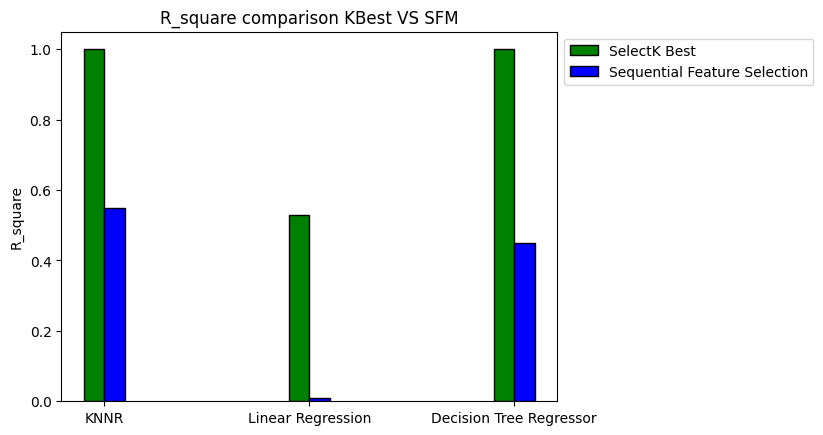

In [ ]:
KBest_R2 = [round(np.mean(df9["R2_8"]), 2) , round(np.mean(df3["R2_2"]), 2) , round(np.mean(df6["R2_5"]), 2)]
SelectFromModel_R2 = [round(np.mean(df12['R2_11']), 2) , round(np.mean(df10['R2_9']), 2) , round(np.mean(df11['R2_10']), 2)]
models_name = ["KNNR", "Linear Regression", "Decision Tree Regressor"]

X_axis = np.arange(len(models_name))

plt.bar(X_axis + 0.15 , KBest_R2 , color = 'Green' , width = 0.10 , edgecolor = 'black' , label = 'SelectK Best')
plt.bar(X_axis + 0.25 , SelectFromModel_R2 , color = 'Blue'  , width = 0.10 , edgecolor = 'black' , label = 'Sequential Feature Selection')

plt.xticks(X_axis + 0.20, models_name)

plt.legend(bbox_to_anchor=(1 , 1))

plt.ylabel("R_square")

plt.title("R_square comparison KBest VS SFM")

plt.show()

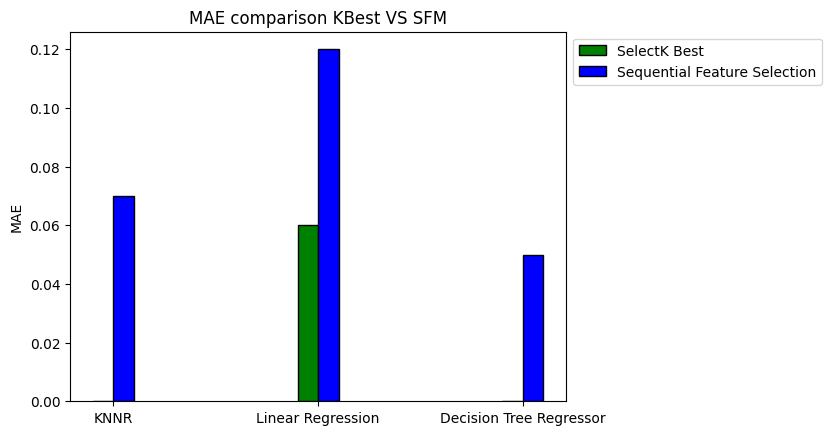

In [ ]:
KBest_R2 = [round(np.mean(df9["MAE8"]), 2) , round(np.mean(df3["MAE2"]), 2) , round(np.mean(df6["MAE5"]), 2)]
SelectFromModel_R2 = [round(np.mean(df12['MAE11']), 2) , round(np.mean(df10['MAE9']), 2) , round(np.mean(df11['MAE10']), 2)]
models_name = ["KNNR", "Linear Regression", "Decision Tree Regressor"]

X_axis = np.arange(len(models_name))

plt.bar(X_axis + 0.15 , KBest_R2 , color = 'Green' , width = 0.10 , edgecolor = 'black' , label = 'SelectK Best')
plt.bar(X_axis + 0.25 , SelectFromModel_R2 , color = 'Blue'  , width = 0.10 , edgecolor = 'black' , label = 'Sequential Feature Selection')

plt.xticks(X_axis + 0.20, models_name)

plt.legend(bbox_to_anchor=(1 , 1))

plt.ylabel("MAE")

plt.title("MAE comparison KBest VS SFM")

plt.show()

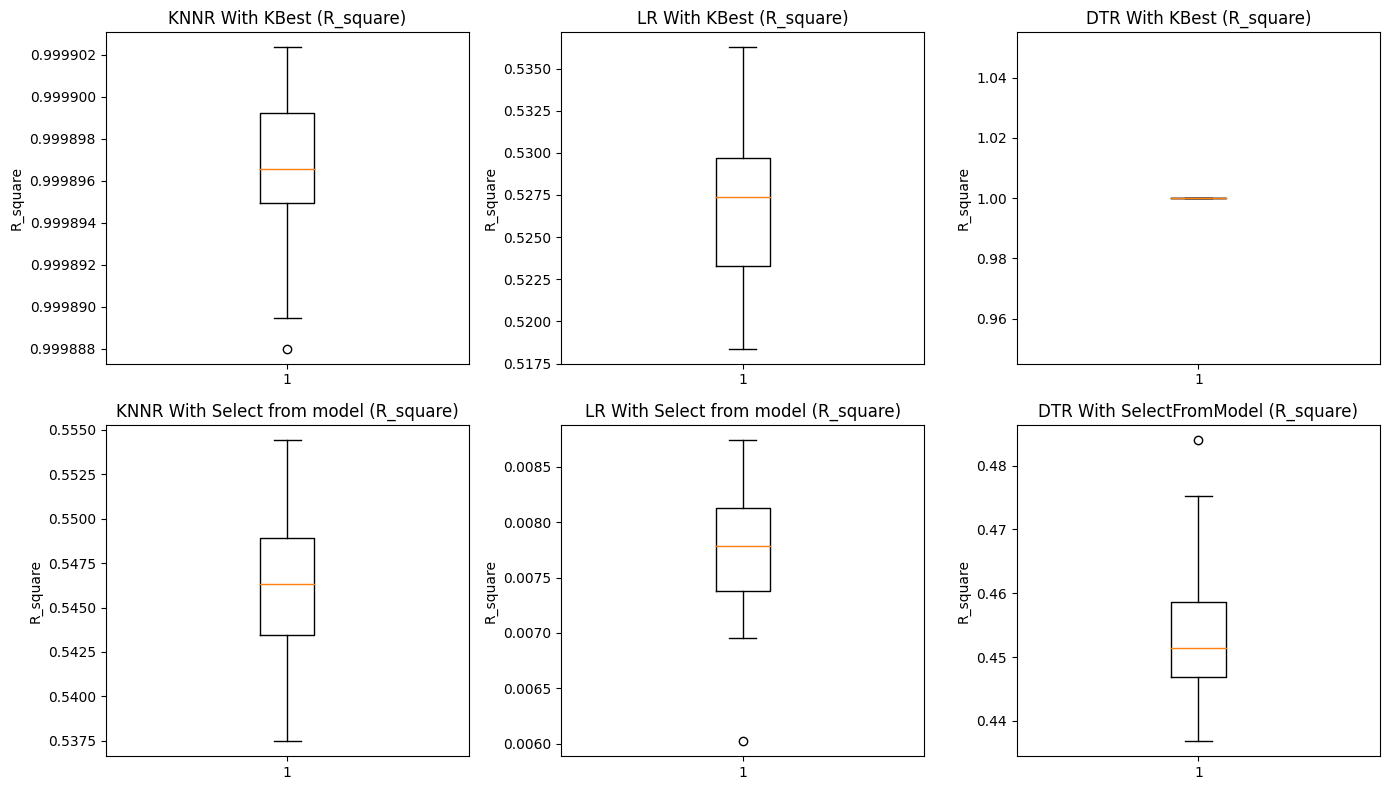

In [ ]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 3, 1)

values = [df9['R2_8']* (10**-5 + 9.999 * 10**-1)]
plt.boxplot(values)
plt.title('KNNR With KBest (R_square)')
plt.ylabel('R_square')

plt.subplot(2, 3, 2)

values = [df3['R2_2']]
plt.boxplot(values)
plt.title('LR With KBest (R_square)')
plt.ylabel('R_square')

plt.subplot(2, 3, 3)

values = [df6['R2_5']]
plt.boxplot(values)
plt.title('DTR With KBest (R_square)')
plt.ylabel('R_square')

plt.subplot(2, 3, 4)

values = [df12['R2_11']]
plt.boxplot(values)
plt.title('KNNR With Select from model (R_square)')
plt.ylabel('R_square')

plt.subplot(2, 3, 5)

values = [df10['R2_9']]
plt.boxplot(values)
plt.title('LR With Select from model (R_square)')
plt.ylabel('R_square')

plt.subplot(2, 3, 6)

values = [df11['R2_10']]
plt.boxplot(values)
plt.title('DTR With SelectFromModel (R_square)')
plt.ylabel('R_square')

plt.tight_layout()

plt.show()

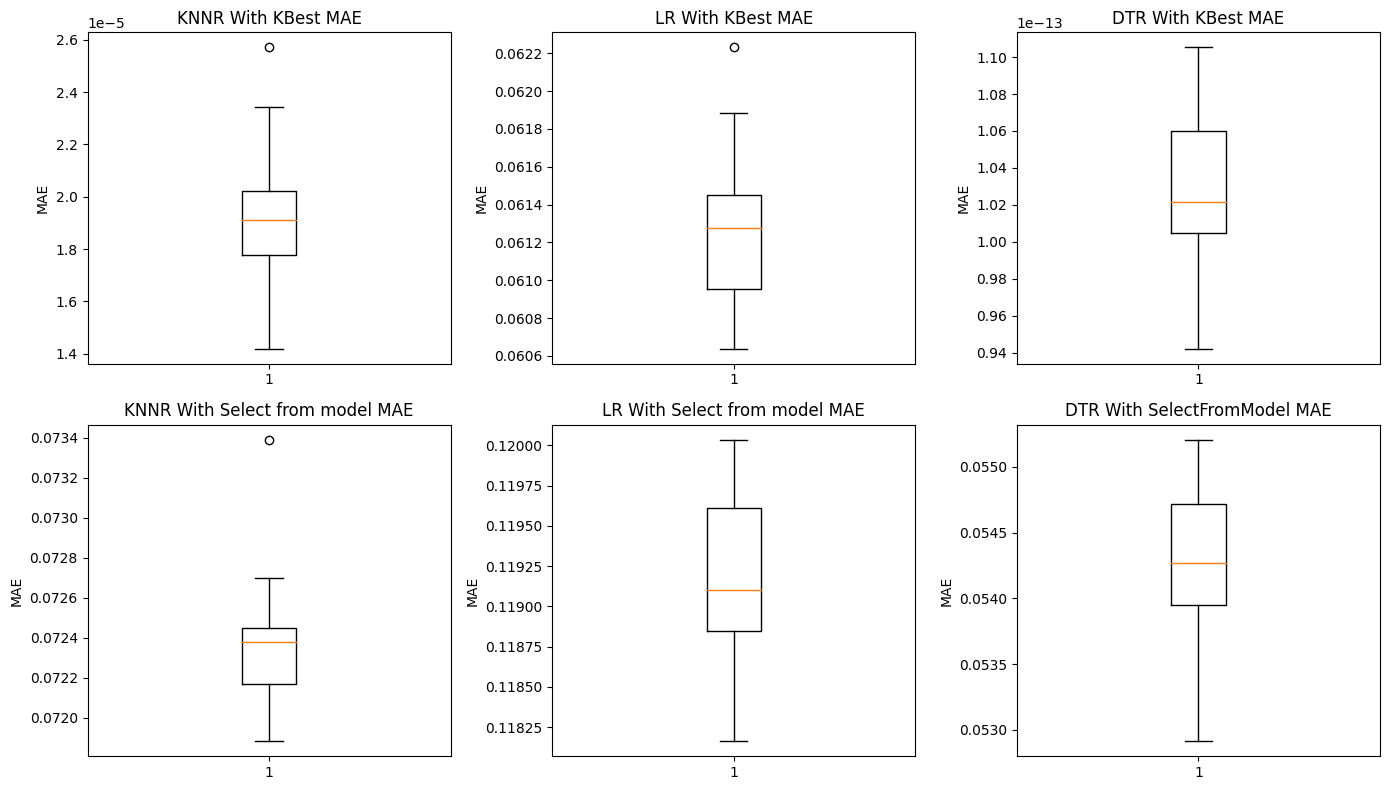

In [ ]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 3, 1)

values = [df9['MAE8']]
plt.boxplot(values)
plt.title('KNNR With KBest MAE')
plt.ylabel('MAE')

plt.subplot(2, 3, 2)

values = [df3['MAE2']]
plt.boxplot(values)
plt.title('LR With KBest MAE')
plt.ylabel('MAE')

plt.subplot(2, 3, 3)

values = [df6['MAE5']]
plt.boxplot(values)
plt.title('DTR With KBest MAE')
plt.ylabel('MAE')

plt.subplot(2, 3, 4)

values = [df12['MAE11']]
plt.boxplot(values)
plt.title('KNNR With Select from model MAE')
plt.ylabel('MAE')

plt.subplot(2, 3, 5)

values = [df10['MAE9']]
plt.boxplot(values)
plt.title('LR With Select from model MAE')
plt.ylabel('MAE')

plt.subplot(2, 3, 6)

values = [df11['MAE10']]
plt.boxplot(values)
plt.title('DTR With SelectFromModel MAE')
plt.ylabel('MAE')

plt.tight_layout()

plt.show()